# Linear Regression - Applied

For this section we will bring together all of the different elements of creating a linear regression model for a data science project.  This will include some of the following concepts:


- Data Exploration
- Handling (Multi)Collinearity in regression 
- Handling Categorical Variables for regression
- Dealing with assumption violations -- the Log Transformation
- Multiple Regression with Interaction and Polynomials 
- Evaluating the Model
- Train Test Split
- Scaling the DAta

## Part I. Setting Up our Notebook
Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. Let's recall the interpretation of $R^2$ in simple linear regression represents the __proportion of variance explained by the model__. What if we make the model more complex by including more predictors in it such that it account for even more variance in the outcome?

In [1]:
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 50)


In [42]:
bikeshare = pd.read_csv('bikeshare.csv')
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [43]:
target = bikeshare['cnt']

## Part II: Data Exploration

Take a moment to explore the data and see if there is anything you can learn about the data that will lead you to do certain transformations.

* What is the range for different features?
* What is the distributions for different features?
* What are the data types for the different features?
* What is the relationship between different features and the target variable?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1233174a8>]],
      dtype=object)

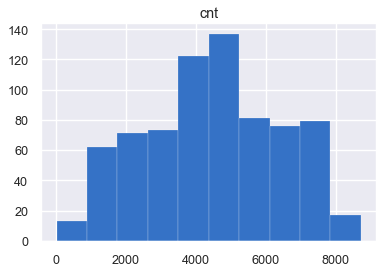

In [44]:
sns.set_style('darkgrid')
bikeshare.hist(column='cnt')

In [45]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


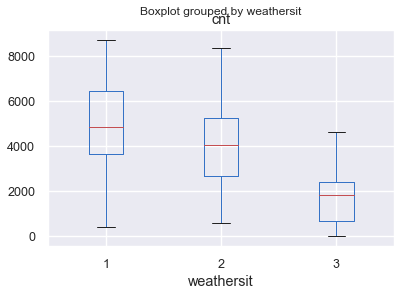

In [46]:
bikeshare.boxplot('cnt',by='weathersit')

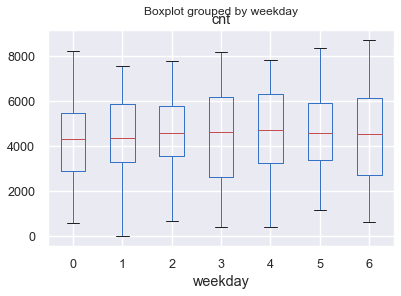

In [47]:
bikeshare.boxplot('cnt',by='weekday')

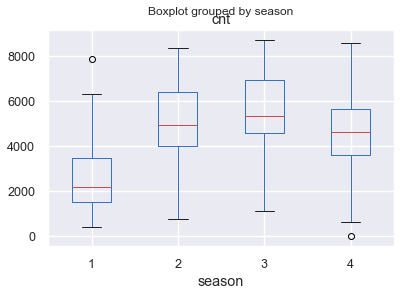

In [48]:
bikeshare.boxplot('cnt',by='season')

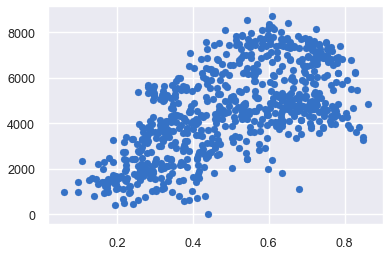

In [49]:
plt.scatter(bikeshare['temp'], bikeshare['cnt'])

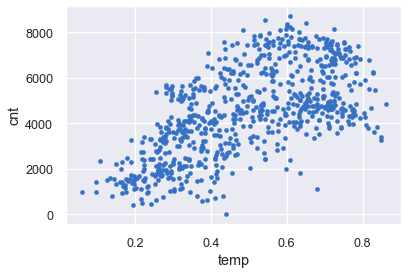

In [50]:
bikeshare.plot.scatter('temp', 'cnt', c='b')

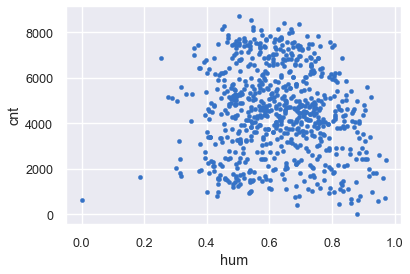

In [51]:
bikeshare.plot.scatter('hum', 'cnt', c='b')

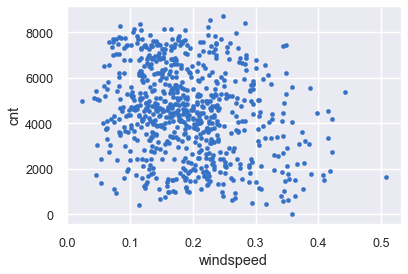

In [52]:
bikeshare.plot.scatter('windspeed', 'cnt', c='b')

In [53]:
model = ols(formula = 'cnt~temp',data=bikeshare).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           2.81e-81
Time:                        15:49:52   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1214.6421    161.164      7.537      0.000     898.242    1531.042
temp        6640.7100    305.188     21.759      0.000    6041.558    7239.862
==============================================================================
Omnibus:                       20.477   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.566
Skew:                           0.167   Prob(JB):                      0.00187
Kurtosis:                       2.452   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part III:  Working with Categorical Variable 
Including categorical variables in linear regression allows us to compare mean values for different categories within that variable, just like ANOVA. We can work with categorical variables in multiple regression by transforming it to dummy variable. 

Converting a categorical variable to dummy variables is essentially creating new columns of $(n-1)$ encoded as either 1 or 0, where n represents the levels in the variable. 

For example, if we want to convert the season variable from last week to dummy variable, we would create 3 columns for them. Let's look at an example

Whenever we convert categorical data into binary/dummy data, we must drop one of the levels from the data set. There are two reasons for this:

1) The dropped category becomes the reference point for the other categories.  

2) with out doing this, we would have perfect multicollinearity in our data set and the model wouldn't be able to solve for the values of the coefficients.  

https://datascience.stackexchange.com/questions/27957/why-do-we-need-to-discard-one-dummy-variable
https://www.algosome.com/articles/dummy-variable-trap-regression.html

#### Visualizing categorical variables 

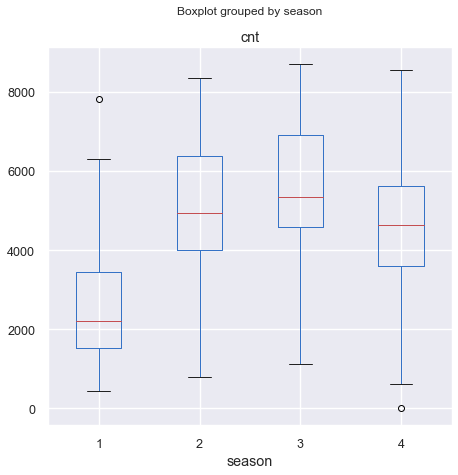

In [54]:
bikeshare.boxplot('cnt',by = 'season',figsize = (7,7))

In [55]:
season_dummy = pd.get_dummies(bikeshare['season'],prefix = 'season_cat', drop_first=True)

In [56]:
season_dummy.head()

,season_cat_2,season_cat_3,season_cat_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [57]:
season_dummy.columns = ['spring', 'summer', 'fall']

In [58]:
bikeshare = pd.concat([bikeshare, season_dummy], axis=1, sort=False)

In [59]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0


***Look at the columns of `holiday`, `weekday`, and `workingday` and decide which column needs to be turned into dummy variables, and write the code to do so.***

In [60]:
#your code here
bikeshare.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [61]:
weekday_dummy = pd.get_dummies(bikeshare['weekday'],prefix = 'weekday', drop_first=True)

In [62]:
weekday_dummy.columns = ['monday','tuesday','wednesday','thursday','friday','saturday']

In [63]:
bikeshare = pd.concat([bikeshare, weekday_dummy], axis=1, sort=False)

#### Now doing this with weather situation

In [64]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,monday,tuesday,wednesday,thursday,friday,saturday
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,0,0,0,0,0,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,0,0,0,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,1,0,0,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0,1,0,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0,0,1,0,0,0


In [65]:
weathersit_dummy = pd.get_dummies(bikeshare['weathersit'],prefix = 'weathersit', drop_first=True)
bikeshare = pd.concat([bikeshare, weathersit_dummy], axis = 1)

In [66]:
temp_reg_weathersit = ols(formula = 'cnt~weathersit_2+weathersit_3',data=bikeshare).fit()
temp_reg_weathersit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           3.11e-17
Time:                        15:50:22   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4876.7862     85.567     56.994      0.000    4708.798    5044.774
weathersit_2  -840.9238    145.073     -5.797      0.000   -1125.736    -556.112
weathersit_3 -3073.5005    410.790     -7.482      0.000   -3879.975   -2267.026
==============================================================================
Omnibus:                       38.064   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.665
Skew:                          -0.061   Prob(JB):                     0.000397
Kurtosis:                       2.293   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model for only using Weather situation as a predictor takes the form of:
$$Y = 4876.7862 - 840.9238X_1 - 3073.5005X_2$$

We can interpret that as:

- when the weather situation is 1, the mean value of bikeshare rentals is 4876.78;
- when the weather situation is 2, the mean value of bikeshare is 4876.7862 - 840.9238 * 1 = 4035.86
- when the weather situation is 3, the mean value of bikeshare is 4876.7862 - 840.9238 * 0 - 3073.5005 * 1 = 1803.28 

In [67]:
bikeshare['yr'].unique()

array([0, 1])

In [68]:
features = bikeshare.drop(['instant', 'dteday', 'season', 'weekday', 'weathersit'], axis = 1)

## Part IV. Handling (Multi)collinearity 
Multiple regression is evaluated by examining the increase in $R^2$ -- whether a variable is worth adding to the model depends on whether the $R^2$ increase significantly after including it. Collinearity and Multicollinearity occur when various predictors in the models are correlated with each other. As we can imagine, if we have two highly correlated feature, one of them will not contribute greatly to the model. Therefore, we want to examine the correlated features and remove them. 

https://www.statisticssolutions.com/point-biserial-correlation/

The best way to examine correlation is to use the seaborn correlation heatmap

***Create a dataframe that shows us the correlation between the features***

In [69]:
corr = features.corr()

In [70]:
corr

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,monday,tuesday,wednesday,thursday,friday,saturday,weathersit_2,weathersit_3
yr,1.000000,-0.001792,0.007954,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,-0.000793,-0.000805,-0.000776,0.003340,-0.000557,-0.000557,-0.000557,-0.000557,-0.004461,-0.003869,-0.073941
mnth,-0.001792,1.000000,0.019191,-0.005901,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,-0.314015,0.199855,0.686954,-0.002920,-0.004612,-0.001207,0.003334,0.006740,0.003864,-0.005365,0.078543
holiday,0.007954,0.019191,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,-0.024265,-0.026247,0.016915,0.279823,-0.046599,-0.046599,-0.023155,-0.023155,-0.070435,-0.018972,-0.029577
workingday,-0.002013,-0.005901,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,0.014543,0.016218,-0.005149,0.152529,0.268401,0.268401,0.259978,0.259978,-0.602541,0.050099,0.028820
temp,0.047604,0.220205,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.155424,0.678471,-0.224793,-0.004333,0.019809,0.020574,0.019941,0.000456,-0.029882,-0.097706,-0.058238
atemp,0.046106,0.227459,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.163661,0.655956,-0.204904,0.000525,0.022465,0.018148,0.020873,-0.008108,-0.030889,-0.094253,-0.064727
hum,-0.110651,0.222204,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,-0.003854,0.023101,0.162732,0.027861,0.039875,0.050000,-0.052636,-0.040456,-0.023980,0.491834,0.267011
windspeed,-0.011817,-0.207502,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545,0.097513,-0.139732,-0.135466,0.001081,0.007042,-0.014461,0.005873,-0.021548,0.032266,-0.037408,0.117362
casual,0.248546,0.123006,0.054274,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804,0.218013,0.303945,-0.098448,-0.103883,-0.173315,-0.176305,-0.152672,-0.056915,0.368323,-0.167439,-0.166103
registered,0.594248,0.293488,-0.108745,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517,0.085578,0.296440,0.124764,0.002054,0.077920,0.089129,0.109740,0.073615,-0.149954,-0.140962,-0.224835


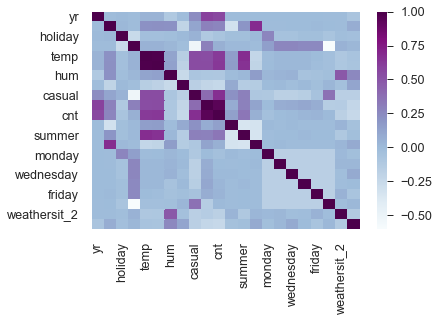

In [71]:
sns.heatmap(corr, cmap = "BuPu")
# as we can see, month and season are highly correlated, as well as temp and atemp, so we might want to remove those
# features if we were to conduct multiple linear regression 

In [74]:
corr[abs(features.corr() > 0.75)]

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,monday,tuesday,wednesday,thursday,friday,saturday,weathersit_2,weathersit_3
yr,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,1.000000,0.991702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atemp,NaN,NaN,NaN,NaN,0.991702,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hum,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
windspeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.945517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
features = features.drop(['atemp', 'mnth'], axis = 1)

## Part V. Working with Transformation and Assumption Violations

####  Log Transformation
- While it is not necessary for your predictors to be normally distributed, having normally distrbuted predictors can benefit your model overall
- Upon examining the distributional shape of your predictors, consider applying a log transformation on your predictors if they are non normal
- Log transformation also helps with the violation of nonlinearity (if the data are strictly positive)
    - Be mindful of whether you apply log transformation on the dependent and/or independent variables, and how the relationship can change as a function of the log transformation
    - Adding an engineered feature can also help. For example, if you believe a polynomial term $X^2$ can account for more variance in the outcome. 
        - Don't get carried away with it -- adding more polynomial terms might help you account for the variance in your model, but might not generalize to unseen data
- Log transformation can be applied to the dependent variable if the homoscedasticity assumption is violated
    - this might present in time series data, where variance increase as your predictor value grows as a function of inflation. We will return to this point later in the course


#### How does log transformation affect the interpretation of our models?
Overall, applying a log transformation to our model changes the interpretation from the raw change to the percentage change. However, it also varies depending on what variables you applied transformation to

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X2$$

Original Model interpretation: 

- Logging the independent variable 
$$ Y = \beta_0 + \beta_1 ln(X_1) + \beta_2 X2$$
Interpretation: holding all other variables constant, every one __percent__ change in x1 is associated with $\frac{B_1}{100}$ change in y


- Logging the dependent variable 
$$ ln(Y) = \beta_0 + \beta_1 X_1 + \beta_2 X2$$
Interpretation: holding all other variables constant, every __unit__ of change in x1 is associated with $\beta_1$ percentage change in y 


- Logging both the independent variable and dependent variables
$$ ln(Y) = \beta_0 + \beta_1 ln(X_1) + \beta_2 X2$$
Interpretation: We would interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable. holding all other variables constant, every percent of change in x1 is associated with $(1.01^{\beta_1} - 1)*100$ percentage change in y 



In [76]:
cont_features = ['temp', 'hum',
       'windspeed', 'casual', 'registered']

ValueError: figure size must be positive finite not (0, 3)

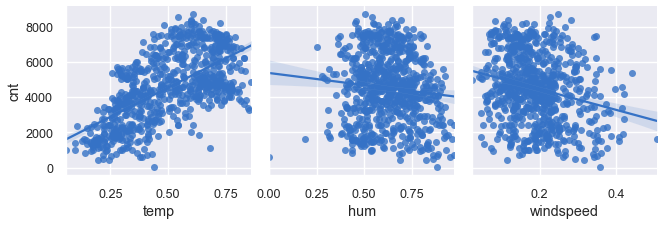

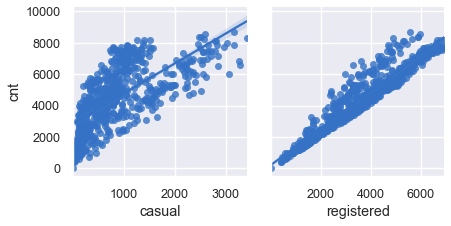

In [77]:
#break the colums in to groups to plot 4 on a row at a time
n = 3
row_groups= [cont_features[i:i+n] for i in range(0, len(features), n) ]

for i in row_groups:
    pp = sns.pairplot(data=bikeshare, y_vars=['cnt'],x_vars=i, kind="reg", height=3)

## Part IV. Validating your model

#### Using RMSE to validate your model

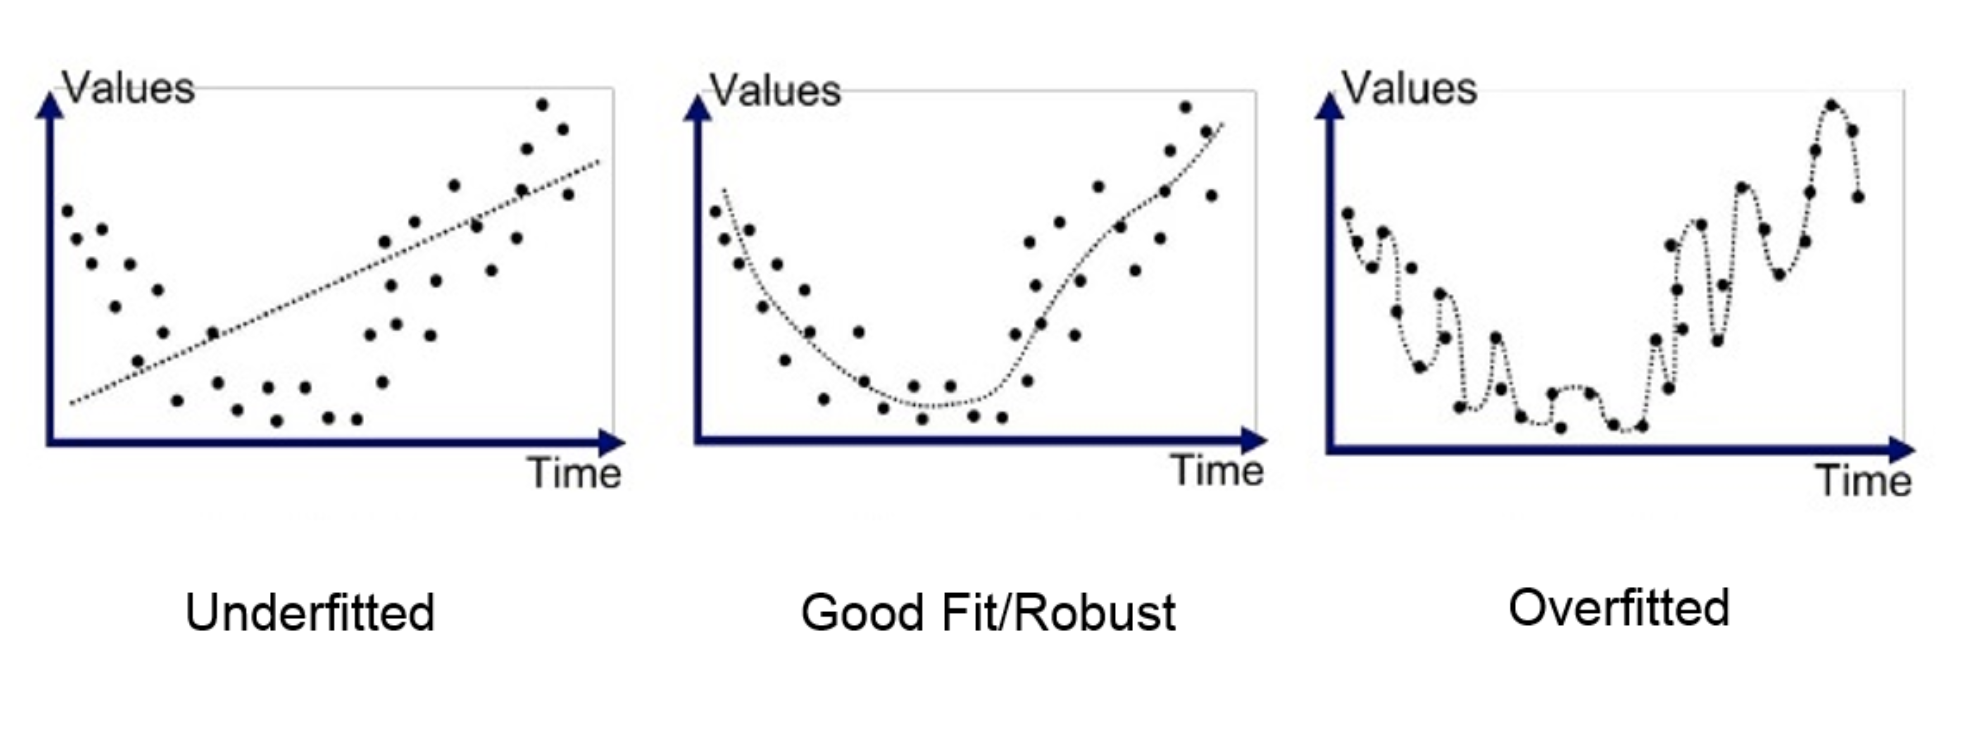

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

#### Train-Test Split 




In [78]:
features.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,spring,summer,fall,monday,tuesday,wednesday,thursday,friday,saturday,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,331,654,985,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.363478,0.696087,0.248539,131,670,801,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.437273,0.248309,120,1229,1349,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.590435,0.160296,108,1454,1562,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.226957,0.436957,0.186900,82,1518,1600,0,0,0,0,0,1,0,0,0,0,0


In [79]:
features_only = features.drop(['casual', 'registered', 'cnt'], axis = 1)

In [80]:
#import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_only, target, random_state=24,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (584, 17) Target:  (584,)
Test set - Features:  (147, 17) Target:  (147,)


In [81]:
# fit a model
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

1152.0318865650615
[ 2.01906135e+03 -7.09809050e+15 -7.09809050e+15  5.24655204e+03
 -1.02119186e+03 -3.01218431e+03  1.14284293e+03  8.42610449e+02
  1.51707148e+03  7.09809050e+15  7.09809050e+15  7.09809050e+15
  7.09809050e+15  7.09809050e+15  4.92385949e+02 -4.59778166e+02
 -2.01447899e+03]


In [82]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.8375449800207512


In [83]:
y_train_pred = lm.predict(X_train)

In [85]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
cnt_std = target.std()


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Mean Absolute Error in Z-Score:', train_mae/cnt_std )


Mean Absolute Error: 570.5343901419162
Mean Squared Error: 625652.6580498037
Root Mean Squared Error: 790.9820845315043
Mean Absolute Error in Z-Score: 0.29451322397726265


### Predicting the Test Set

In [86]:
y_pred = lm.predict(X_test)

In [87]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.7735457510432776


In [89]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error  Z:', test_mae/cnt_std )


Mean Absolute Error:644.1045607430684
Mean Squared Error:754999.8543626302
Root Mean Squared Error:868.9072760442452
Mean Absolute Error  Z: 0.3324905808319703


### Comparing our Model's performance on training data versus test data.

In [90]:

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  790 vs. Testing:  868


Text(0, 0.5, 'Predictions')

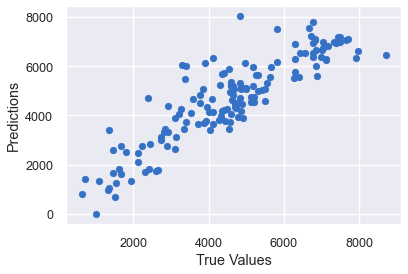

In [91]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

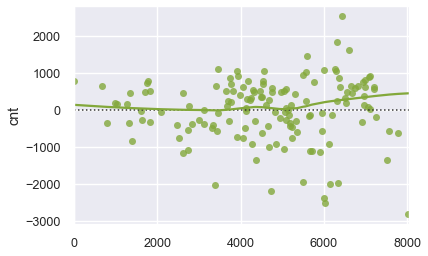

In [92]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

## Part IV. Work with Interaction Term for Multiple Regression 
Interaction is an interesting effect in regression (and ANOVA). For example, do years of education and gender affect income? How about the interaction effect of education **and** gender? To be specific, the effect of income from someone who is educated and male could be more than the mere addition of the two. There might be "something else" to it then being educated plus male, and that "something else" is **interaction**. In other words, interaction term is included as part of the linear regression because it could be more or less than the sum of their parts.

Bringing it back to the bikeshare example, would people be even less willing to rent bikes when it is holiday **and** the weather is terrible? Let's find out!

#### Visualizing interaction 
Essentially, linear regression with interaction terms allow us to fit different slopes to different levels of the categorical variables. Let's take a look at what that might look like

In [93]:
# from sklearn.linear_model import LinearRegression


regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()


In [94]:
features.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,spring,summer,fall,monday,tuesday,wednesday,thursday,friday,saturday,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,331,654,985,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.363478,0.696087,0.248539,131,670,801,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.437273,0.248309,120,1229,1349,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.590435,0.160296,108,1454,1562,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.226957,0.436957,0.186900,82,1518,1600,0,0,0,0,0,1,0,0,0,0,0


In [95]:
weathersit_1 = features[(features["weathersit_2"]!=1) & (features["weathersit_3"]!=1) ]
weathersit_2 = features[features["weathersit_2"]==1]
weathersit_3 = features[features["weathersit_3"]==1]

In [96]:
temp_1 = weathersit_1["temp"].values.reshape(-1, 1)
temp_2 = weathersit_2["temp"].values.reshape(-1, 1)
temp_3 = weathersit_3["temp"].values.reshape(-1, 1)

In [97]:
regression_1.fit(temp_1, weathersit_1["cnt"])
regression_2.fit(temp_2, weathersit_2["cnt"])
regression_3.fit(temp_3, weathersit_3["cnt"])

pred_1 = regression_1.predict(temp_1)
pred_2 = regression_2.predict(temp_2)
pred_3 = regression_3.predict(temp_3)

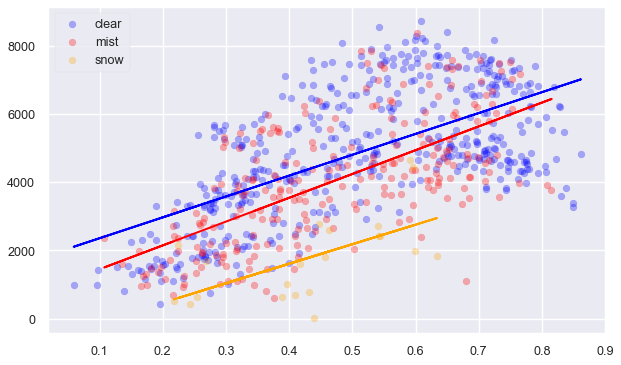

In [98]:
plt.figure(figsize=(10,6))

plt.scatter(temp_1, weathersit_1["cnt"],  color='blue', alpha = 0.3, label = 'clear')
plt.scatter(temp_2, weathersit_2["cnt"],  color='red', alpha = 0.3, label ='mist')
plt.scatter(temp_3, weathersit_3["cnt"],  color='orange', alpha = 0.3, label = 'snow')

plt.plot(temp_1, pred_1,  color='blue', linewidth=2)
plt.plot(temp_2, pred_2,  color='red', linewidth=2)
plt.plot(temp_3, pred_3,  color='orange', linewidth=2)

plt.ylabel("")
plt.xlabel("")
plt.legend();

## Part V. Polynomial Regression
Sometimes, the relationship between two variables might not be linear but curvilinear. In that scenario, we can add higher dimensional polynomial object to linearly transform the predictors such that the result can be better modeled to fit the outcome.

Degrees of polynomials:
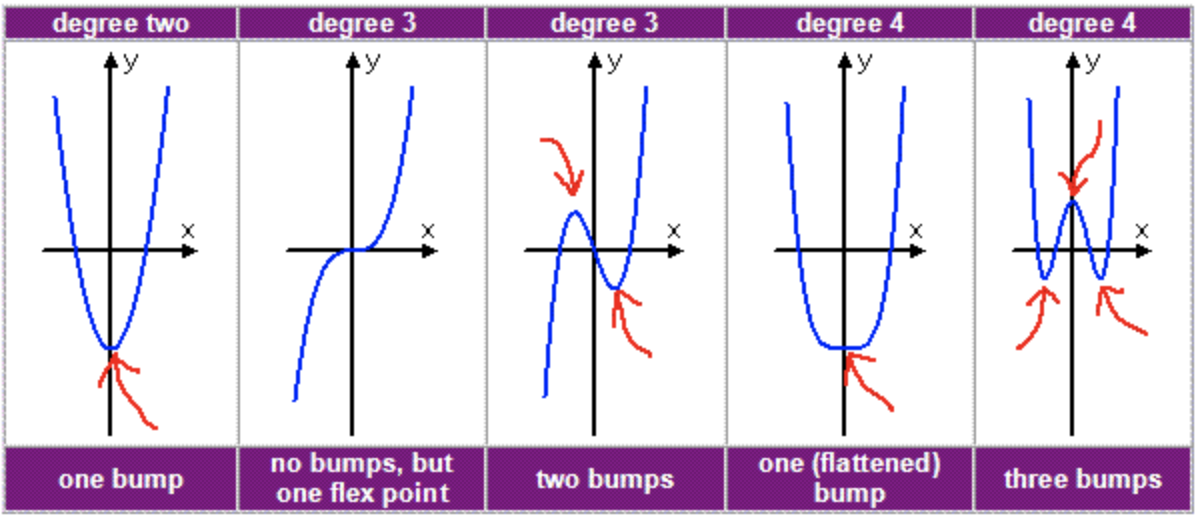

Sometimes simple linear regression cannot capture the curvilinear relationship between variables, so imposing a polynomial terms can better account for this relationship. 
Some of the example for this are:
- Anxiety vs. academic performance
- Energy vs. Focus
- Perceived confidence vs. amount of makeup 

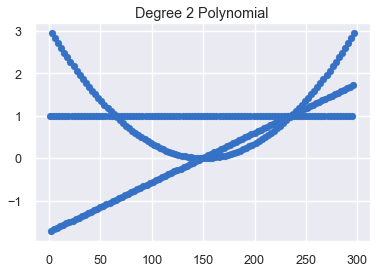

In [99]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Making 1-100 numbers
a = np.arange(1,100,1)
a = a[:,np.newaxis]

#Scaling data with 0 mean and 1 standard Deviation, so it can be observed easily
scaler = StandardScaler()
a = scaler.fit_transform(a)

#Applying PolynomialFeatures
poly = PolynomialFeatures(degree=2)
a_poly = poly.fit_transform(a)

#Flattening Polynomial feature matrix (Creating 1D array), so it can be plotted. 
a_poly = a_poly.flatten()
#Creating array of size a_poly with number series. (For plotting)
xarr = np.arange(1,a_poly.size+1,1)

#Plotting
plt.scatter(xarr,a_poly)
plt.title("Degree 2 Polynomial")
plt.show()

In [100]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
poly_features = poly.fit_transform(features_only)

In [101]:
poly_features

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.]])

In [102]:
pd.DataFrame(poly_features).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,1.0,0.0,0.0,0.0,0.344167,0.805833,0.160446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.363478,0.696087,0.248539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.196364,0.437273,0.248309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.200000,0.590435,0.160296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.226957,0.436957,0.186900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
column_names = poly.get_feature_names(features_only.columns)

In [104]:
pd.DataFrame(poly_features, columns=column_names).head()

,1,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,monday,tuesday,wednesday,thursday,friday,saturday,weathersit_2,weathersit_3,yr^2,yr holiday,yr workingday,yr temp,yr hum,yr windspeed,yr spring,...,tuesday friday,tuesday saturday,tuesday weathersit_2,tuesday weathersit_3,wednesday^2,wednesday thursday,wednesday friday,wednesday saturday,wednesday weathersit_2,wednesday weathersit_3,thursday^2,thursday friday,thursday saturday,thursday weathersit_2,thursday weathersit_3,friday^2,friday saturday,friday weathersit_2,friday weathersit_3,saturday^2,saturday weathersit_2,saturday weathersit_3,weathersit_2^2,weathersit_2 weathersit_3,weathersit_3^2
0,1.0,0.0,0.0,0.0,0.344167,0.805833,0.160446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.363478,0.696087,0.248539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.196364,0.437273,0.248309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.200000,0.590435,0.160296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.226957,0.436957,0.186900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
poly_df = pd.DataFrame(poly_features, columns=column_names)

In [106]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(poly_df, target, random_state=24,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (584, 171) Target:  (584,)
Test set - Features:  (147, 171) Target:  (147,)


In [107]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


In [108]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Mean Absolute Error in Z-Score:', train_mae/price_std )

Mean Absolute Error: 570.5343901419162
Mean Squared Error: 625652.6580498037
Root Mean Squared Error: 790.9820845315043
Mean Absolute Error in Z-Score: 0.29451322397726265


In [109]:
y_pred = lm.predict(X_test)

In [110]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error  Z:', test_mae/price_std )

Mean Absolute Error:643.985032684949
Mean Squared Error:2735498.2196887466
Root Mean Squared Error:1653.9341642546558
Mean Absolute Error  Z: 0.33242887974197344


In [111]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  790 vs. Testing:  1653


## Conclusion
In this lesson, you learned how to perform multiple regression, incorporate different variables, conduct feature engineering for variables, build and evaluate your models. There are so, so much more to linear modeling and you are encouraged to research into different methods and applications for linear models and incorporate them into your second project!

